In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [21]:
data = {'Waist_cm': [71,89,64,74,87,93,79,81,75,72,70,66,81,78,110],
              'Weight_kg': [51,66,45,57,64,75,61,62,55,53,48,46,63,60,100]
              }

df = pd.DataFrame(data,columns= ['Waist_cm','Weight_kg'])
print (df)

    Waist_cm  Weight_kg
0         71         51
1         89         66
2         64         45
3         74         57
4         87         64
5         93         75
6         79         61
7         81         62
8         75         55
9         72         53
10        70         48
11        66         46
12        81         63
13        78         60
14       110        100


In [11]:
df

,Waist_cm,Weight_kg
0,71,51
1,89,66
2,64,45
3,74,57
4,87,64
5,93,75
6,79,61
7,81,62
8,75,55
9,72,53


In [12]:
df.shape

(15, 2)

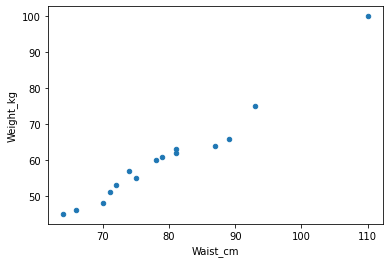

In [13]:
df.plot(kind='scatter',x='Waist_cm',y='Weight_kg')
plt.show()

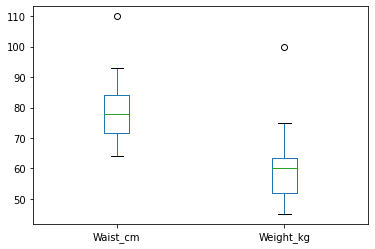

In [14]:
df.plot(kind='box')
plt.show()

In [18]:
df.corr()

,Waist_cm,Weight_kg
Waist_cm,1.000000,0.981216
Weight_kg,0.981216,1.000000


In [22]:
Waist=pd.DataFrame(df['Waist_cm'])
Weight=pd.DataFrame(df['Weight_kg'])

In [23]:
Weight

,Weight_kg
0,51
1,66
2,45
3,57
4,64
5,75
6,61
7,62
8,55
9,53


In [24]:
Waist

,Waist_cm
0,71
1,89
2,64
3,74
4,87
5,93
6,79
7,81
8,75
9,72


In [25]:
lm=linear_model.LinearRegression()
model = lm.fit(Waist, Weight)

In [26]:
model.coef_

array([[1.13470708]])

In [27]:
model.intercept_

array([-29.62009537])

In [28]:
model.score(Waist, Weight)

0.9627843958606757

In [29]:
Weight_predict=97
Weight_predict

97

In [30]:
X=([67,78,94])
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
dfs=pd.concat([X,Y], axis=1, keys=['Waist_new_cm','Weight_new_kg'])
dfs

,Waist_new_cm,Weight_new_kg
,0,0
0,67,46.405279
1,78,58.887057
2,94,77.042371


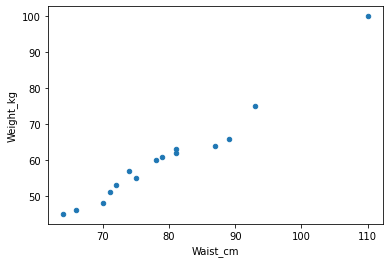

In [31]:
df.plot(kind='scatter', x='Waist_cm',y='Weight_kg')
plt.show()

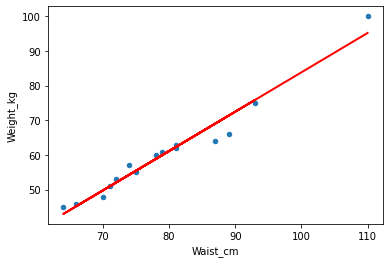

In [32]:
df.plot(kind='scatter', x='Waist_cm',y='Weight_kg')
plt.plot(Waist,model.predict(Waist),color='red', linewidth=2)
plt.show()

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [16]:
import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
print (df)


    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         0
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         1
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

In [17]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [19]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

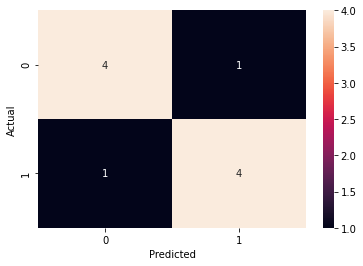

In [20]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [21]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])

X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']  

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)  #train is based on 75% of the dataset, test is based on 25% of dataset

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print (X_test) #test dataset
print (y_pred) #predicted values

    gmat  gpa  work_experience
22   550  2.3                4
20   620  3.3                2
25   670  3.3                6
4    680  3.9                4
10   610  2.7                3
15   610  3.0                1
28   650  3.7                6
11   690  3.7                5
18   540  2.7                2
29   660  3.3                5
[0 0 1 1 0 0 1 1 0 1]


In [23]:
new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])


X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)  #in this case, you may choose to set the test_size=0. You should get the same prediction here

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)



new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])
y_pred=logistic_regression.predict(df2)

print (df2)
print (y_pred)

   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
[0 1 1 0 1]
